In [3]:
!conda install -c conda-forge --yes plotnine

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\justi\anaconda3

  added / updated specs:
    - plotnine


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py38h9bdc248_1         3.1 MB  conda-forge
    descartes-1.1.0            |             py_4           7 KB  conda-forge
    mizani-0.7.1               |             py_0          53 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    palettable-3.3.0           |             py_0          86 KB  conda-forge
    plotnine-0.7.0             |             py_0         3.6 MB  conda-forge
    python_abi



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# 모델링 라이브러리
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from category_encoders.ordinal import OrdinalEncoder
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# 기타 라이브러리
import warnings
import random
import gc
import os

warnings.filterwarnings("ignore", category=RuntimeWarning)        
sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'plotnine'

In [407]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:.3f}'.format

# 변수 설명

- id
- age : 나이
- workclass : 고용 형태
- fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
- education : 교육 수준
- education_num : 교육 수준 수치
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- capital_gain : 양도 소득
- capital_loss : 양도 손실
- hours_per_week : 주당 근무 시간
- native_country : 국적
- income : 수익 (예측해야 하는 값)
  >50K : 1, <=50K : 0

# 데이터 불러오기

In [615]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./submission/whochurie_del_flnwgt.csv') # fnlwgt 제거

In [617]:
test['income'] = sample_submission['prediction']

# 후처리

In [556]:
train.drop(['id'], axis = 1, inplace = True)

In [628]:
columns = train.columns.tolist()

## income class가 1개이면서 row가 2개 이상인 경우

In [558]:
ans = pd.DataFrame()
for col in columns:
    for value in train[col].value_counts().index.tolist():
        if (train[train[col] == value]['income'].nunique() == 1) &\
        (train[train[col] == value]['income'].value_counts().values[0] >= 2):
            count = train[train[col] == value]['income'].value_counts().values[0]
            income = train[train[col] == value]['income'].value_counts().index[0]
            ans = ans.append(pd.DataFrame({'column' : [col], 'value' : [value],\
                                          'income' : [income], 'count' : [count]}))          
ans = ans.reset_index(drop = True)
# income 제거
ans.drop([3040, 3041], axis = 0, inplace = True)
# income 변수 라벨링
ans['income'] = ans['income'].apply(lambda x: 0 if x == '<=50K' else 1)

## ans에서 fnlwgt를 제거한 경우

In [509]:
del_fnlwgt = ans[ans['column'] != 'fnlwgt']
del_fnlwgt['column'].value_counts()

In [ ]:
sample_submission = pd.read_csv('./submission/0min.csv')
print(sample_submission['income'].value_counts())
for x in del_fnlwgt.iterrows():
    col = x[1]['column']
    value = x[1]['value'] 
    income = x[1]['income']
    sample_submission.loc[sample_submission[col] == value, 'income'] = income

In [559]:
test.loc[test['capital_gain'] == 3103, 'income'] = 1

## 저장

In [622]:
sample_submission['prediction'] = test['income']

In [ ]:
sample_submission.to_csv('./submission/유인덱스.csv', index = False)

In [481]:
df1 = pd.read_csv('./submission/whochurie_gain+4386=1.csv') # flnwgt / 4386 제거
df2 = pd.read_csv('./submission/whochurie_gain+3103=1.csv') # flnwgt / 3103 제거
df3 = pd.read_csv('./submission/whochurie_del_flnwgt.csv') # flnwgt

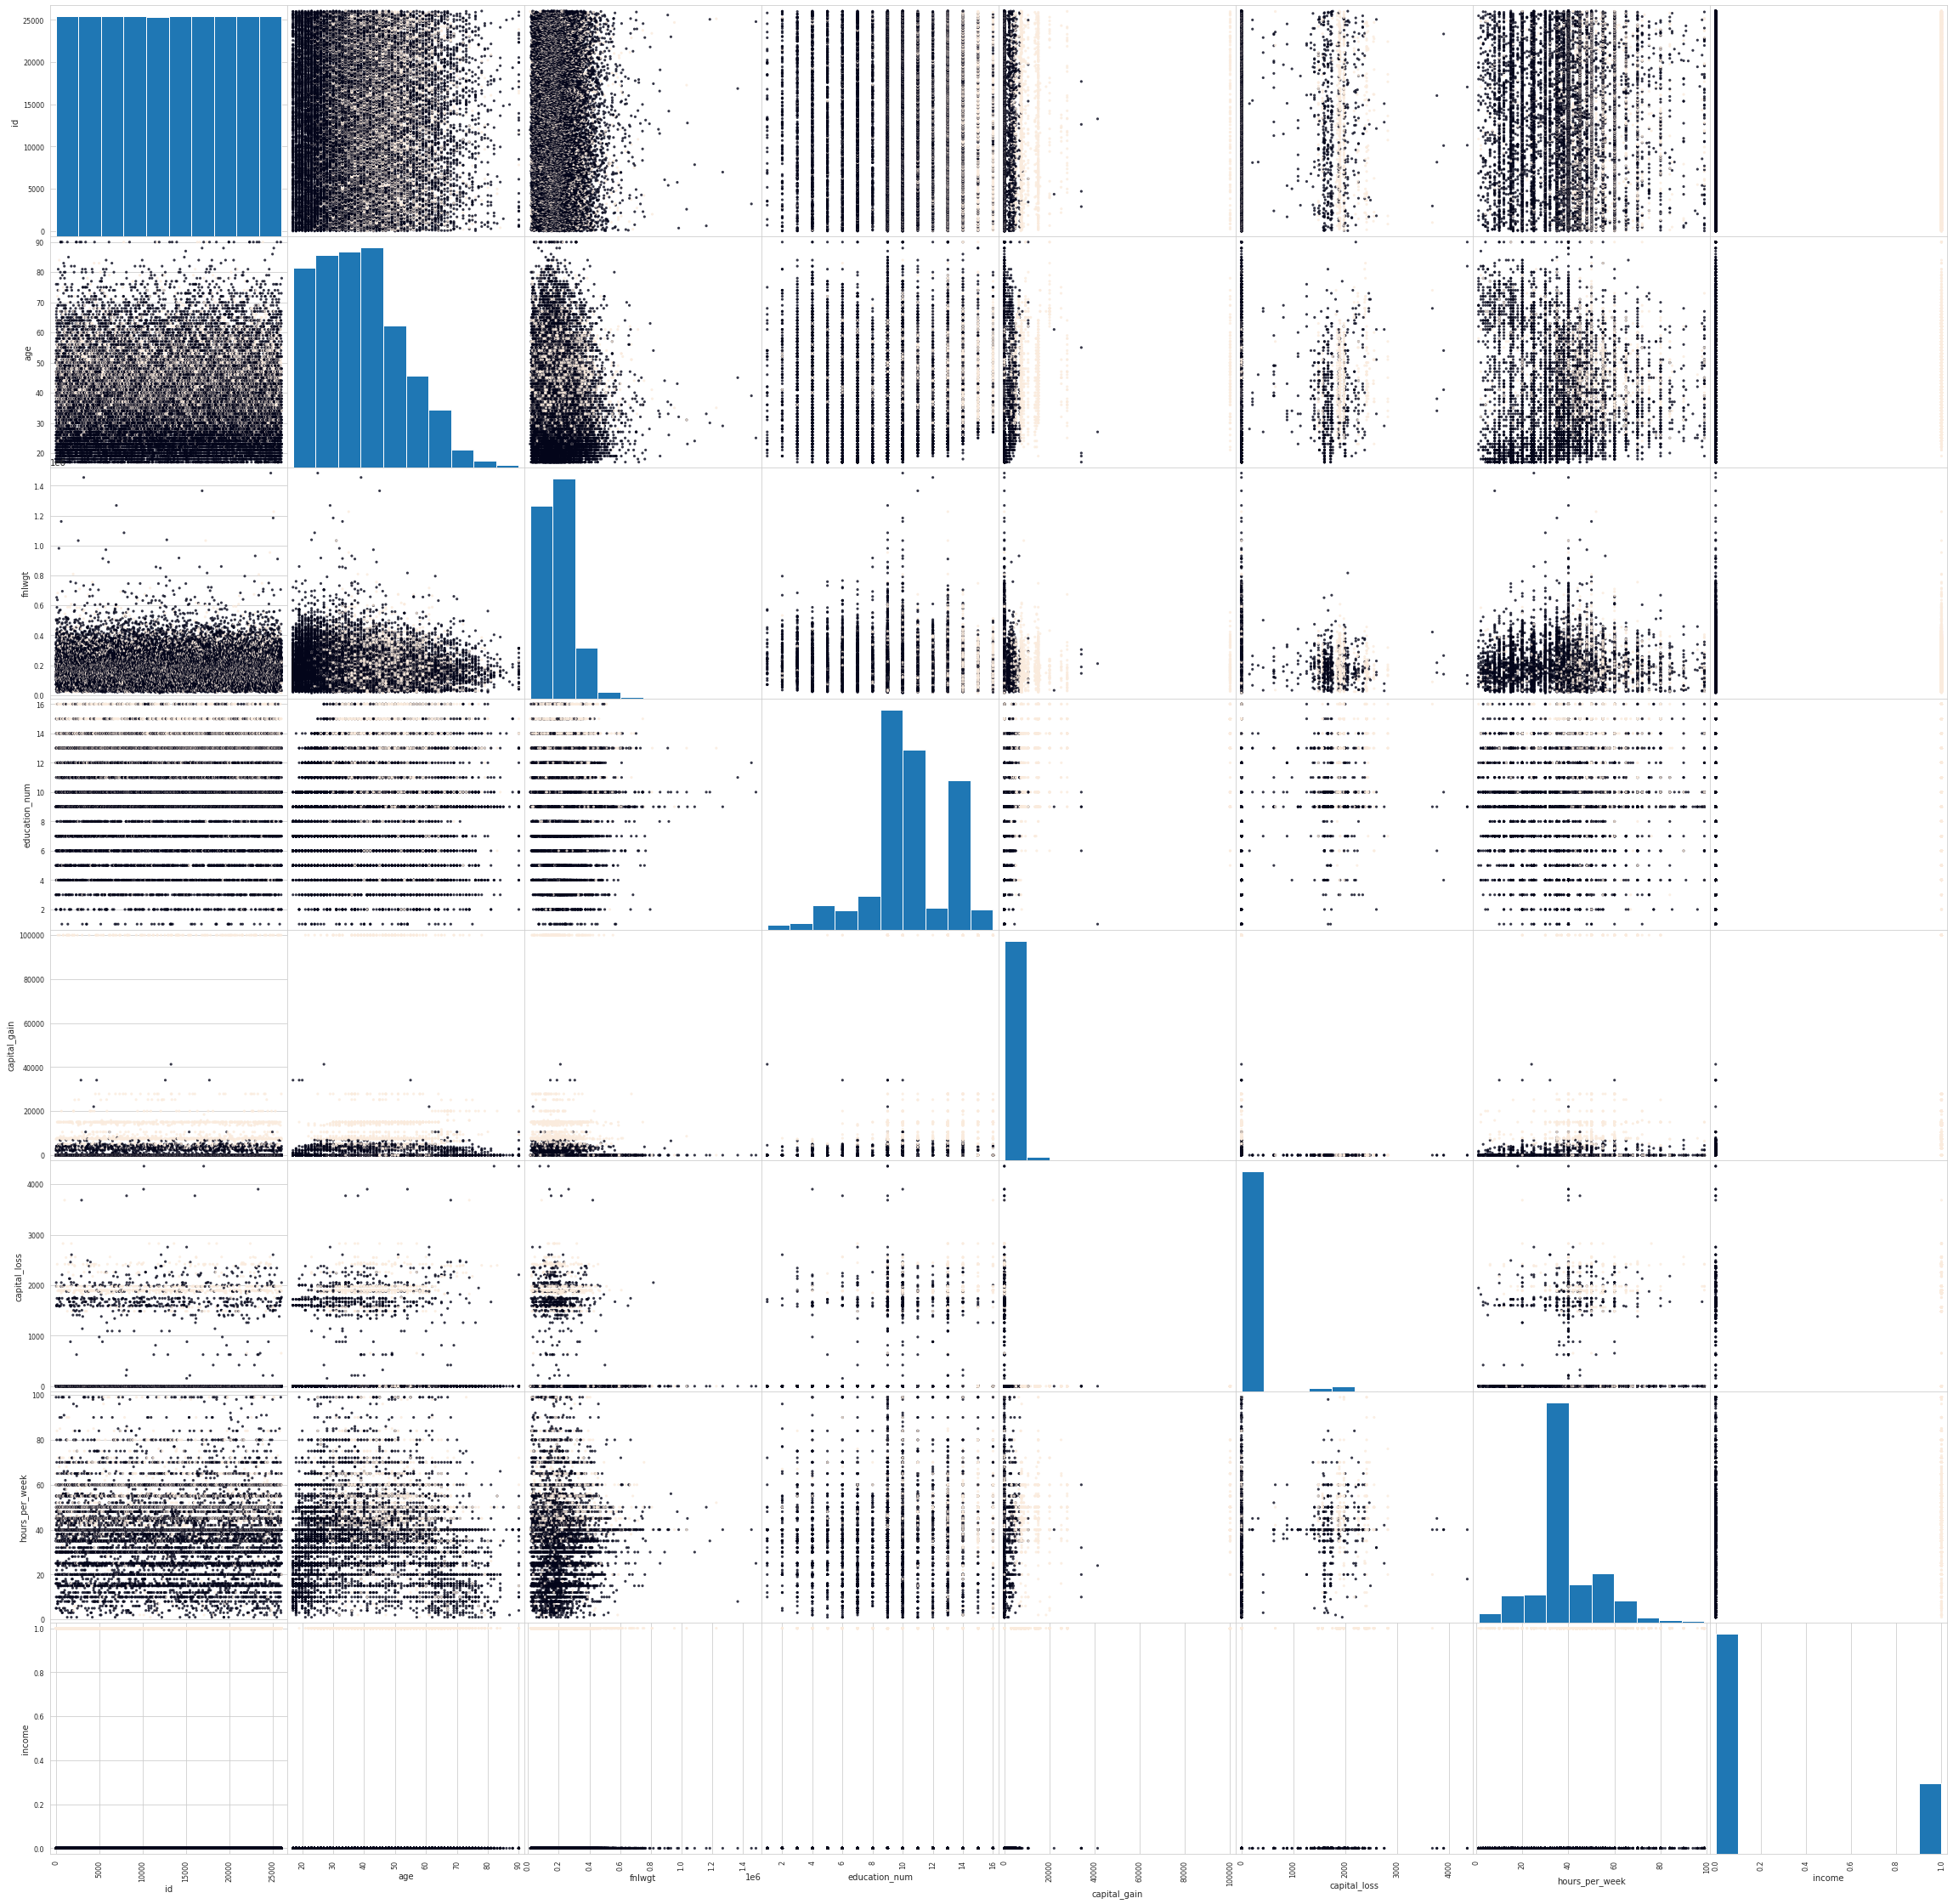

In [428]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix

#ploting scatter graph of species comparing all features to each other
scatter_matrix(train, c=train['income'],marker='o', s=10,alpha=.8,figsize=(40, 40))
plt.show()